In [ ]:
import sys
print(f'Interpreter dir: {sys.executable}')
import os

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    
print(f'Working dir: {os.getcwd()}')
%load_ext autoreload
%autoreload 2

In [60]:
import pandas as pd
from pandas_profiling import ProfileReport
import geopandas as gpd

import folium
import seaborn as sns

# Weather data download

Let's find the area of where the DMA's are first

In [6]:
import requests
import fiona
import geopandas as gp

fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw'
df_map = gpd.read_file("data/raw/AW_Geospatial_DMA Data/All DMAs/All DMAs.kml")
df_map

,Name,Description,geometry
0,NORW18MA,,"POLYGON Z ((1.26463 52.66464 0.00000, 1.26437 ..."
1,NORCRDMA,,"POLYGON Z ((1.26595 52.66583 0.00000, 1.26575 ..."
2,NORFIFMA,,"MULTIPOLYGON Z (((1.29412 52.65461 0.00000, 1...."
3,NORW21MA,,"MULTIPOLYGON Z (((1.30928 52.66023 0.00000, 1...."
4,NORW37MA,,"POLYGON Z ((1.32489 52.69344 0.00000, 1.32227 ..."
5,BLOFLDMA,,"POLYGON Z ((1.46004 52.64514 0.00000, 1.45468 ..."
6,SWALSHMA,,"POLYGON Z ((1.47795 52.64584 0.00000, 1.48358 ..."


In [12]:
m = folium.Map(location = [52.6,1.6], zoom_start=10)
for i in range(df_map.shape[0]):
    folium.GeoJson(df_map.geometry.iloc[i],
                  name = df_map.Name.iloc[i]).add_to(m)
m

# Gather data from Norwich.

Would be nice to have detailed data but I think its enough for the whole area

In [47]:
from wwo_hist import retrieve_hist_data


frequency=1
start_date = '01-DEC-2016'
end_date = '01-JUN-2020'
api_key = '22bd10aef6ae40fda80111703202608'
location_list = ['Norwich']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for Norwich


Currently retrieving data for Norwich: from 2016-12-01 to 2016-12-31
http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=22bd10aef6ae40fda80111703202608&q=Norwich&format=json&date=2016-12-01&enddate=2016-12-31&tp=1
Time elapsed (hh:mm:ss.ms) 0:00:01.242283
Currently retrieving data for Norwich: from 2017-01-01 to 2017-01-31
http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=22bd10aef6ae40fda80111703202608&q=Norwich&format=json&date=2017-01-01&enddate=2017-01-31&tp=1
Error: HTTP Error 503: Service Unavailable. Attempt 1/100. Retry....
Error: HTTP Error 503: Service Unavailable. Attempt 2/100. Retry....
Error: HTTP Error 503: Service Unavailable. Attempt 3/100. Retry....
Error: timed out. Attempt 4/100. Retry....
Error: timed out. Attempt 5/100. Retry....
Error: HTTP Error 503: Service Unavailable. Attempt 6/100. Retry....
Error: HTTP Error 503: Service Unavailable. Attempt 7/100. Retry....
Error: HTTP Error 503: Serv

In [48]:
hist_weather_data[0]

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2016-12-01 00:00:00,7,3,0.0,6.8,2,9,10:00 AM,06:42 PM,08:44 AM,...,35,54,95,0.0,1031,4,10,281,20,Norwich
1,2016-12-01 01:00:00,7,3,0.0,6.8,2,9,10:00 AM,06:42 PM,08:44 AM,...,35,55,95,0.0,1030,3,10,279,20,Norwich
2,2016-12-01 02:00:00,7,3,0.0,6.8,2,9,10:00 AM,06:42 PM,08:44 AM,...,35,57,95,0.0,1030,3,10,277,20,Norwich
3,2016-12-01 03:00:00,7,3,0.0,6.8,2,9,10:00 AM,06:42 PM,08:44 AM,...,35,58,95,0.0,1030,3,10,276,20,Norwich
4,2016-12-01 04:00:00,7,3,0.0,6.8,2,9,10:00 AM,06:42 PM,08:44 AM,...,35,62,95,0.0,1030,3,10,275,20,Norwich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2020-06-01 19:00:00,18,10,0.0,16.7,5,71,03:19 PM,02:58 AM,04:37 AM,...,23,8,82,0.0,1024,13,7,49,15,Norwich
20,2020-06-01 20:00:00,18,10,0.0,16.7,5,71,03:19 PM,02:58 AM,04:37 AM,...,23,10,88,0.0,1024,12,5,43,13,Norwich
21,2020-06-01 21:00:00,18,10,0.0,16.7,5,71,03:19 PM,02:58 AM,04:37 AM,...,24,11,94,0.0,1024,10,2,37,12,Norwich
22,2020-06-01 22:00:00,18,10,0.0,16.7,5,71,03:19 PM,02:58 AM,04:37 AM,...,22,12,95,0.0,1024,10,2,36,11,Norwich


## Simple graphs to double-check


In [65]:
df = hist_weather_data[0]
cols = df.columns[1:]
print(cols)
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df = df.set_index('date_time')
df

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset',
       'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,
2016-12-01 00:00:00,7.0,3.0,0.0,6.8,2.0,9.0,NaN,NaN,NaN,NaN,...,35.0,54.0,95.0,0.0,1031.0,4.0,10.0,281.0,20.0,NaN
2016-12-01 01:00:00,7.0,3.0,0.0,6.8,2.0,9.0,NaN,NaN,NaN,NaN,...,35.0,55.0,95.0,0.0,1030.0,3.0,10.0,279.0,20.0,NaN
2016-12-01 02:00:00,7.0,3.0,0.0,6.8,2.0,9.0,NaN,NaN,NaN,NaN,...,35.0,57.0,95.0,0.0,1030.0,3.0,10.0,277.0,20.0,NaN
2016-12-01 03:00:00,7.0,3.0,0.0,6.8,2.0,9.0,NaN,NaN,NaN,NaN,...,35.0,58.0,95.0,0.0,1030.0,3.0,10.0,276.0,20.0,NaN
2016-12-01 04:00:00,7.0,3.0,0.0,6.8,2.0,9.0,NaN,NaN,NaN,NaN,...,35.0,62.0,95.0,0.0,1030.0,3.0,10.0,275.0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01 19:00:00,18.0,10.0,0.0,16.7,5.0,71.0,NaN,NaN,NaN,NaN,...,23.0,8.0,82.0,0.0,1024.0,13.0,7.0,49.0,15.0,NaN
2020-06-01 20:00:00,18.0,10.0,0.0,16.7,5.0,71.0,NaN,NaN,NaN,NaN,...,23.0,10.0,88.0,0.0,1024.0,12.0,5.0,43.0,13.0,NaN
2020-06-01 21:00:00,18.0,10.0,0.0,16.7,5.0,71.0,NaN,NaN,NaN,NaN,...,24.0,11.0,94.0,0.0,1024.0,10.0,2.0,37.0,12.0,NaN


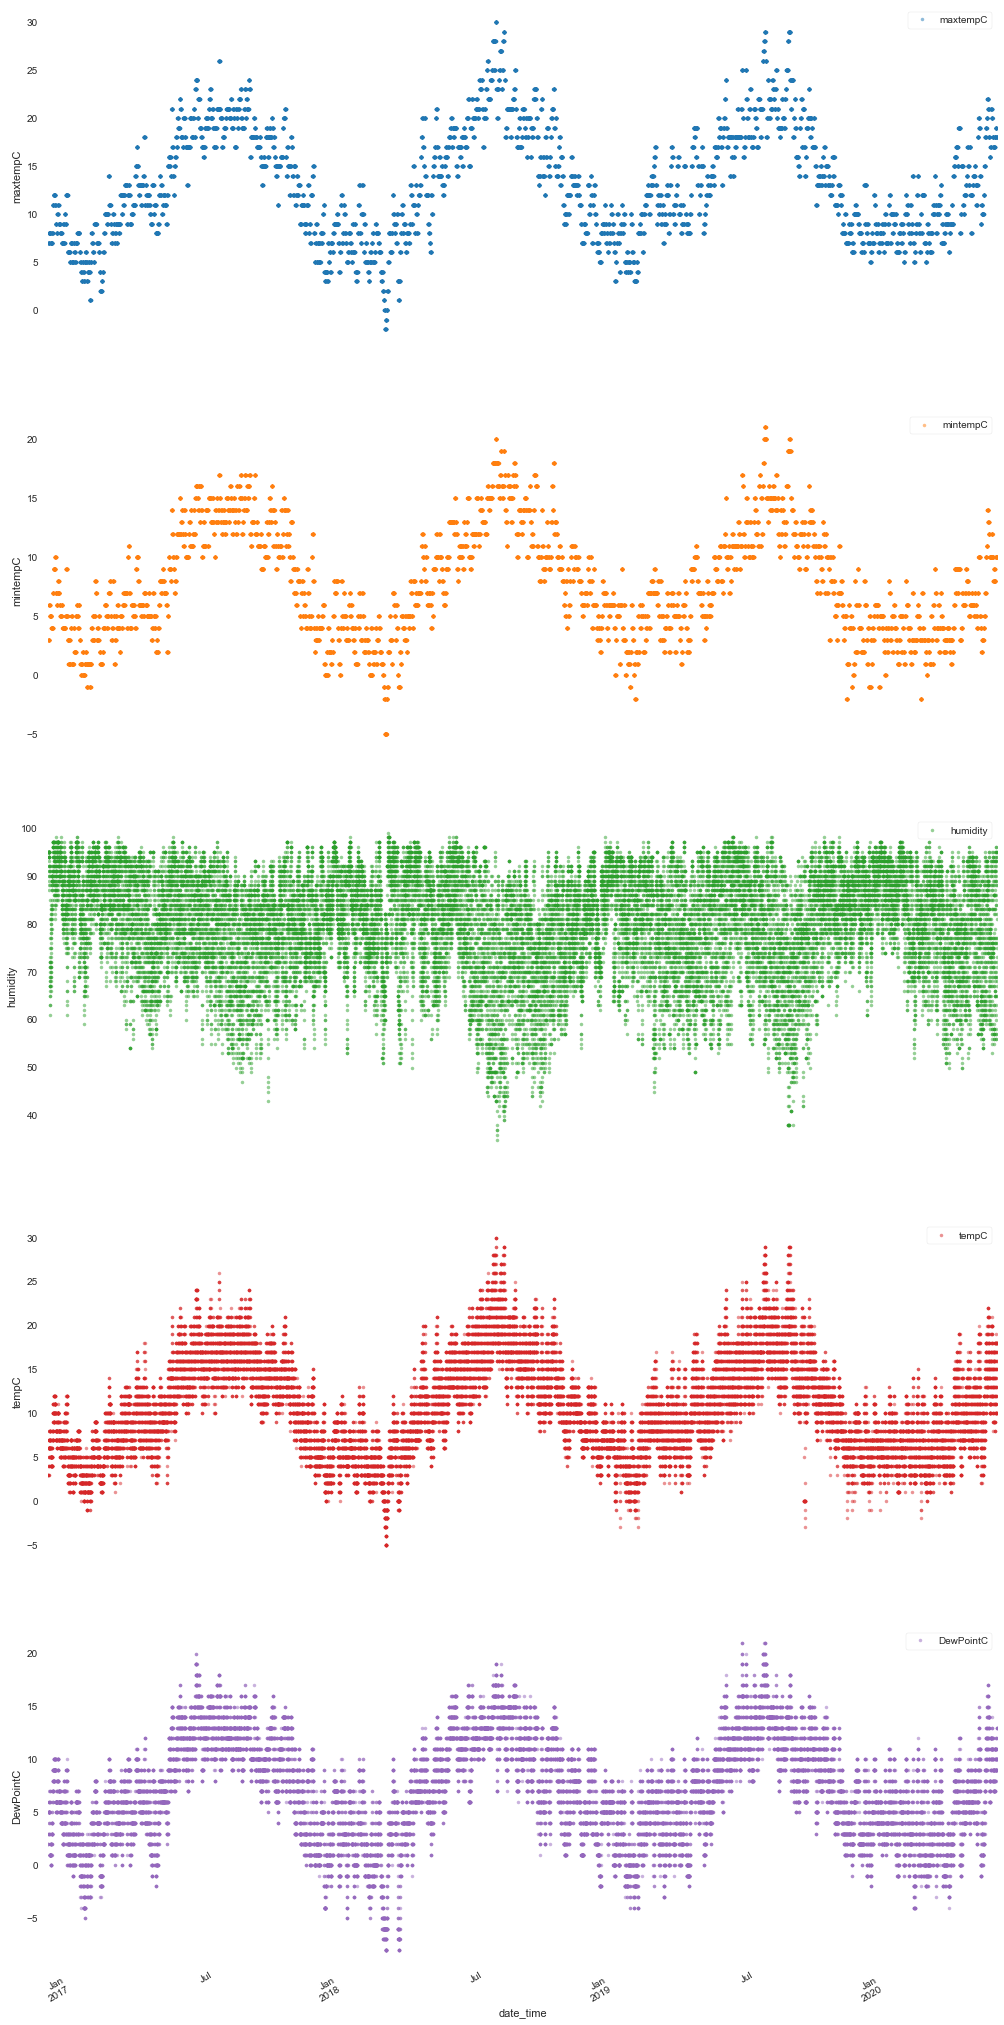

In [82]:
import matplotlib.pyplot as plt

cols_plot = ['maxtempC', 'mintempC', 'humidity','tempC','DewPointC']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 40), subplots=True)
for ax,c in zip(axes, cols_plot):
    ax.set_ylabel(c)

---
# Notes

I have modified some of the funcionality in package wwo_hist. I keep it here for reference, found in `.venv_waterhack/lib/python3.7/site-packages/wwo_hist/__init__.py`:

```python
## (...)
            attempt = 1
            N_attempt = 100
            while attempt < N_attempt:
                try:
                    json_page = urllib.request.urlopen(url_page, timeout=10)
                    break
                except (timeout,HTTPError) as e:
                    print(f"Error: {e}. Attempt {attempt}/{N_attempt}. Retry....")
                    attempt += 1
                    if attempt > N_attempt:
                        print('Something went wrong. Early return')
                        return df_hist
                    
            json_data = json.loads(json_page.read().decode())

# (...)
```